# Classification example 2 using Health Data with PyCaret


In [ ]:
#Code from https://github.com/pycaret/pycaret/

In [2]:
# check version
from pycaret.utils import version
version()

'2.3.1'

# 1. Data Repository

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
data=df

# 2. Initialize Setup

In [5]:
from pycaret.classification import *
clf1 = setup(df, target = 'stroke', session_id=123, log_experiment=True, experiment_name='health2')

,Description,Value
0,session_id,123
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(43400, 12)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9822,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210
rf,Random Forest Classifier,0.9822,0.7962,0.0000,0.0000,0.0000,0.0000,0.0000,0.7070
lr,Logistic Regression,0.9821,0.6887,0.0000,0.0000,0.0000,-0.0002,-0.0007,0.4090
ada,Ada Boost Classifier,0.9821,0.8441,0.0000,0.0000,0.0000,-0.0001,-0.0003,0.3870
knn,K Neighbors Classifier,0.9819,0.5417,0.0000,0.0000,0.0000,-0.0005,-0.0015,0.0940
lightgbm,Light Gradient Boosting Machine,0.9818,0.8354,0.0111,0.2450,0.0210,0.0195,0.0470,0.1320
et,Extra Trees Classifier,0.9817,0.7437,0.0037,0.1500,0.0072,0.0060,0.0202,0.4670
gbc,Gradient Boosting Classifier,0.9816,0.8480,0.0000,0.0000,0.0000,-0.0012,-0.0027,1.2880
lda,Linear Discriminant Analysis,0.9795,0.8395,0.0259,0.1347,0.0433,0.0376,0.0515,0.0560
svm,SVM - Linear Kernel,0.9794,0.0000,0.0111,0.0534,0.0178,0.0127,0.0167,0.2770


# 4. Create Model

In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.6751,0.0000,0.0000,0.0000,-0.0006,-0.0024
1,0.9822,0.6980,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9822,0.6669,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9822,0.6529,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9822,0.7013,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9819,0.6957,0.0000,0.0000,0.0000,-0.0006,-0.0024
6,0.9822,0.7857,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9819,0.6158,0.0000,0.0000,0.0000,-0.0006,-0.0024
8,0.9819,0.6596,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9822,0.7355,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9618,0.5351,0.0926,0.0694,0.0794,0.0603,0.0609
1,0.9608,0.5073,0.0370,0.0290,0.0325,0.0128,0.0129
2,0.9631,0.5539,0.1296,0.0972,0.1111,0.0927,0.0937
3,0.9625,0.5172,0.0556,0.0455,0.0500,0.0311,0.0312
4,0.9638,0.5997,0.2222,0.1500,0.1791,0.1613,0.1646
5,0.9628,0.5265,0.0741,0.0597,0.0661,0.0474,0.0477
6,0.9645,0.5455,0.1111,0.0909,0.1000,0.0821,0.0825
7,0.9628,0.5265,0.0741,0.0597,0.0661,0.0474,0.0477
8,0.9562,0.4958,0.0182,0.0125,0.0148,-0.0068,-0.0069
9,0.9631,0.5266,0.0741,0.0606,0.0667,0.0480,0.0483


In [9]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9822,0.8053,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9822,0.7562,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9822,0.8108,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9821,0.7705,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9822,0.8142,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9822,0.7914,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0001,0.0235,0.0000,0.0000,0.0000,0.0000,0.0000


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [15]:
#ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)

# 5. Tune Hyperparameters

In [16]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.6751,0.0000,0.0000,0.0000,-0.0006,-0.0024
1,0.9822,0.8103,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9822,0.6669,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9822,0.6529,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9822,0.7013,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9819,0.6957,0.0000,0.0000,0.0000,-0.0006,-0.0024
6,0.9822,0.6268,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9819,0.6158,0.0000,0.0000,0.0000,-0.0006,-0.0024
8,0.9819,0.6596,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9822,0.7355,0.0000,0.0000,0.0000,0.0000,0.0000


In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9819,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9822,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


# 6. Ensemble Model

In [18]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.6107,0.0185,0.3333,0.0351,0.0333,0.0751
1,0.9819,0.6763,0.0000,0.0000,0.0000,-0.0006,-0.0024
2,0.9812,0.6402,0.0000,0.0000,0.0000,-0.0019,-0.0042
3,0.9816,0.5961,0.0000,0.0000,0.0000,-0.0013,-0.0035
4,0.9819,0.6676,0.0000,0.0000,0.0000,-0.0006,-0.0024
5,0.9822,0.6122,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9822,0.6289,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9809,0.6649,0.0000,0.0000,0.0000,-0.0025,-0.0049
8,0.9819,0.6254,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9816,0.6504,0.0000,0.0000,0.0000,-0.0013,-0.0035


In [19]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9615,0.5349,0.0926,0.0685,0.0787,0.0595,0.0602
1,0.9608,0.5073,0.0370,0.0290,0.0325,0.0128,0.0129
2,0.9598,0.5341,0.0926,0.0641,0.0758,0.0559,0.0569
3,0.9602,0.5160,0.0556,0.0411,0.0472,0.0274,0.0277
4,0.9641,0.5908,0.2037,0.1429,0.1679,0.1502,0.1527
5,0.9658,0.5462,0.1111,0.0968,0.1034,0.0861,0.0863
6,0.9638,0.5452,0.1111,0.0882,0.0984,0.0801,0.0807
7,0.9598,0.5250,0.0741,0.0526,0.0615,0.0416,0.0423
8,0.9575,0.5054,0.0364,0.0256,0.0301,0.0090,0.0092
9,0.9648,0.5275,0.0741,0.0656,0.0696,0.0517,0.0518


# 7. Blend Models

In [20]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.6065,0.0185,0.3333,0.0351,0.0333,0.0751
1,0.9809,0.6705,0.0000,0.0000,0.0000,-0.0025,-0.0049
2,0.9816,0.6368,0.0185,0.2500,0.0345,0.0321,0.0638
3,0.9806,0.5950,0.0000,0.0000,0.0000,-0.0030,-0.0055
4,0.9826,0.6973,0.0185,1.0000,0.0364,0.0357,0.1349
5,0.9819,0.6485,0.0000,0.0000,0.0000,-0.0006,-0.0024
6,0.9816,0.6384,0.0000,0.0000,0.0000,-0.0013,-0.0035
7,0.9816,0.6687,0.0000,0.0000,0.0000,-0.0013,-0.0035
8,0.9809,0.6266,0.0000,0.0000,0.0000,-0.0019,-0.0043
9,0.9809,0.6580,0.0000,0.0000,0.0000,-0.0025,-0.0049


# 8. Stack Models

In [21]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9822,0.7220,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9822,0.8276,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9822,0.7600,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9822,0.8048,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9822,0.8862,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9822,0.8140,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9822,0.7350,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9822,0.8074,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9819,0.7859,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9822,0.7983,0.0000,0.0000,0.0000,0.0000,0.0000


# 9. Analyze Model

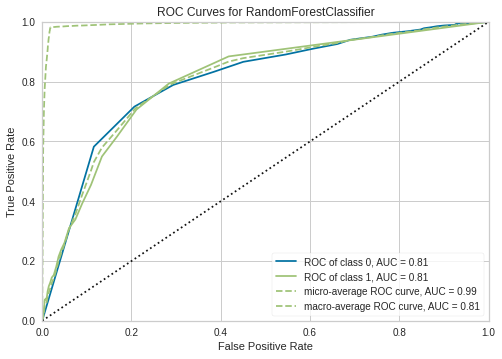

In [22]:
plot_model(rf)

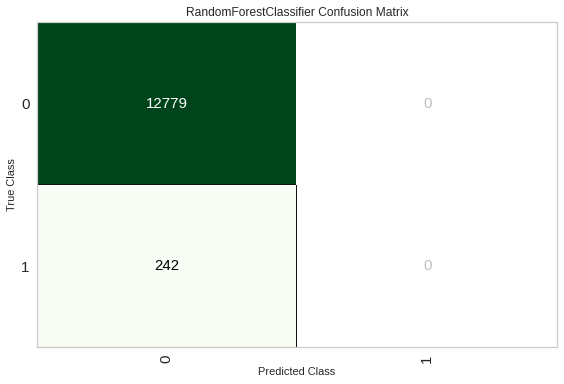

In [23]:
plot_model(rf, plot = 'confusion_matrix')

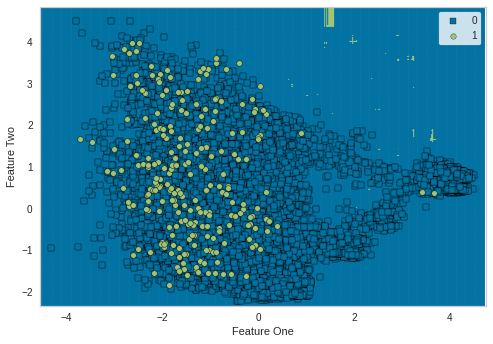

In [24]:
plot_model(rf, plot = 'boundary')

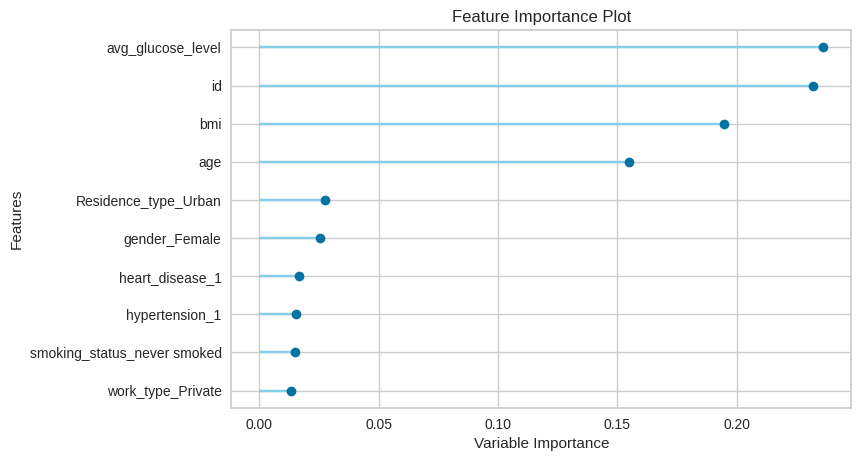

In [25]:
plot_model(rf, plot = 'feature')

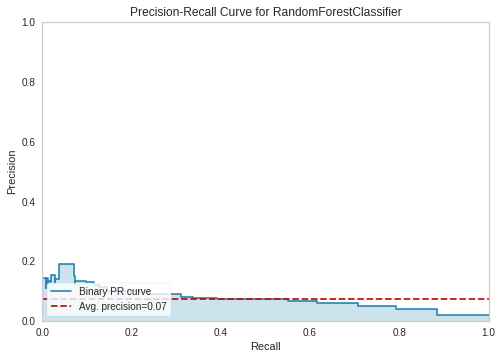

In [26]:
plot_model(rf, plot = 'pr')

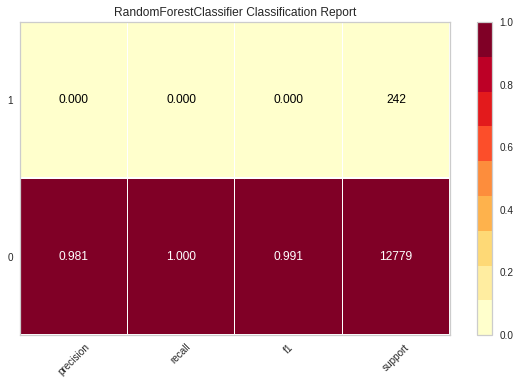

In [27]:
plot_model(rf, plot = 'class_report')

In [28]:
evaluate_model(rf)

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


# 10. Interpret Model

In [ ]:
catboost = create_model('rf', cross_validation=False)

In [ ]:
interpret_model(catboost)

In [ ]:
interpret_model(catboost, plot = 'correlation')

In [ ]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. AutoML()

In [ ]:
best = automl(optimize = 'Recall')
best

# 12. Predict Model

In [ ]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

In [ ]:
new_data = data.copy()
new_data.drop(['Purchase'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

# 13. Save / Load Model

In [ ]:
save_model(best, model_name='best-model')

In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

In [ ]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

In [ ]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [ ]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

# 15. Get Config / Set Config

In [ ]:
X_train = get_config('X_train')
X_train.head()

In [ ]:
get_config('seed')

In [ ]:
from pycaret.classification import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

# 16. MLFlow UI

In [ ]:
# !mlflow ui